# 牛顿迭代法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

import utils
utils.use_svg()
sympy.init_printing()

# 取消科学计数法
np.set_printoptions(suppress=True)

## 问题

在区间 $[a, b]$ 上，求方程 $f(x) = 0$ 的根，正常情况下我们很难直接求出解析解，那么我们退而求其次，寻找一个数值解也不错。

例如：在区间 $[0, 1]$ 上，求方程 $f(x) = x^3 + x - 1 = 0$ 的根；

这算是一个稍微简单的问题，下面我们尝试求解析解：

In [2]:
# 定义方程
x = sympy.Symbol('x')
fx = x ** 3 + x - 1
x, fx

In [3]:
# 列出等式
eq = sympy.Eq(fx, 0)
eq

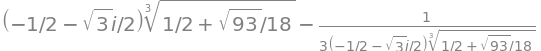

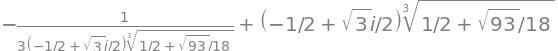

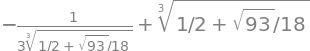

In [4]:
# 求解方程
roots = sympy.solve(eq)
for root in roots:
    display(root)

三次方程有三个解，其中我们只关注实根，另外可以得到它的数值：

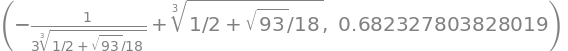

In [5]:
root = roots[2]
nroot = sympy.N(root)
root, nroot

我们可以画出该函数的图像：

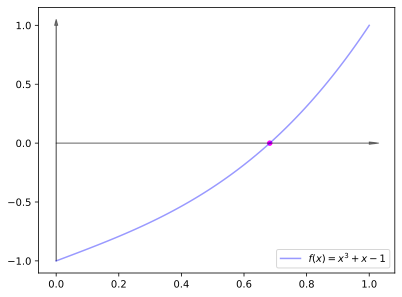

In [6]:
X = np.linspace(0, 1, 100)
FX = sympy.lambdify(x, fx, 'numpy')

ax = plt.figure().add_subplot()
ax.plot(X, FX(X), c='blue', alpha=0.4, label='$f(x) = x^3 + x - 1$')
ax.scatter([nroot], [0], c='magenta', s=20)
ax.arrow(0, -1, 0, 2, head_width=0.01, head_length=0.05, color='black', alpha=0.5)
ax.arrow(0, 0, 1, 0, head_width=0.02, head_length=0.03, color='black', alpha=0.5)
ax.legend()
plt.show()

很多时候，我们没有必要求出确切的解析解，一般来说，求解析解需要跟多的计算资源；

只需要一个近似的数值就可以，比如 $\sqrt{2} \approx 1.414$，那么就有几种方法来求得这个数值。

## 对分法（二分查找）

零点定理：如果函数 $f(x)$ 在区间 $[a, b]$ 之间连续并且 $f(a)f(b) < 0$，那么区间 $[a, b]$ 中至少存在一点 $k$ 使得 $f(k) = 0$

如果函数 $f(x)$ 在区间 $[a, b]$ 之间单调，那么 $k$ 唯一；

对于这种函数，我们就可以使用 **对分法**，从计算机的角度来说就是，有序（单调）数组的二分查找。

对于上面的问题：

In [7]:
# 最后的期望误差
err = 0.00001

a = 0
b = 1

result = []
while (b - a) > err:
    r = (b + a) / 2
    result.append(r)
    t = FX(r)
    if t == 0:
        break
    if t > 0:
        b = r
    else:
        a = r

result = np.array(result)
print(f'iter:{len(result)} r:{r} nroot:{nroot} err:{r - nroot}')

iter:17 r:0.6823348999023438 nroot:0.682327803828019 err:0.00000709607432436421


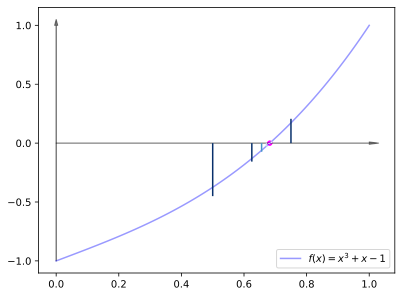

In [8]:
ax = plt.figure().add_subplot()
ax.plot(X, FX(X), c='blue', alpha=0.4, label='$f(x) = x^3 + x - 1$')
ax.scatter([nroot], [0], c='magenta', s=20)
ax.arrow(0, -1, 0, 2, head_width=0.01, head_length=0.05, color='black', alpha=0.5)
ax.arrow(0, 0, 1, 0, head_width=0.02, head_length=0.03, color='black', alpha=0.5)
ax.vlines(x=result, ymin=0, ymax=FX(result) * 1.2, colors=plt.cm.Blues(abs(FX(result)) * 10))
ax.legend()
plt.show()

## 牛顿迭代法

首先计算 $f'(x)$

In [9]:
df = sympy.diff(fx)
DF = sympy.lambdify(x, df, 'numpy')
df

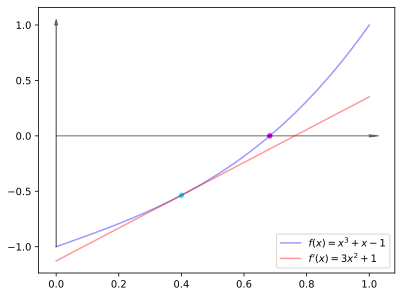

In [10]:
ax = plt.figure().add_subplot()
ax.plot(X, FX(X), c='blue', alpha=0.4, label='$f(x) = x^3 + x - 1$')
ax.plot(X, X * DF(0.4) + FX(0.4) - 0.4 * DF(0.4), c='red', alpha=0.4, label="$f'(x) = 3x^2 + 1$")
ax.scatter([nroot], [0], c='magenta', s=20)
ax.scatter([0.4], [FX(0.4)], c='cyan', s=20)
ax.arrow(0, -1, 0, 2, head_width=0.01, head_length=0.05, color='black', alpha=0.5)
ax.arrow(0, 0, 1, 0, head_width=0.02, head_length=0.03, color='black', alpha=0.5)
ax.legend()
plt.show()

切线在 $x_0$ 的斜率由导数 $f'(x_0)$ 给出，切线上的一点是 $(x_0, f(x_0))$；

直线方程的点斜式是 $y - f(x_0) = f'(x_0)(x - x_0)$；

所以求切线与 $x$ 轴的交点等同与在直线方程中取 $y=0$；

或者，由泰勒公式：

$
\begin{aligned}
f(x) &= f(x_0) + f'(x_0)(x - x_0) + o(x - x_0) \\
f(x) &\approx f(x_0) + f'(x_0)(x - x_0) \\
\end{aligned}
$

于是当 $f(x) = 0$ 时：

$f(x_0) + f'(x_0)(x - x_0) \approx 0$

$\displaystyle x \approx x_0 - {f(x_0) \over f'(x_0)}$


牛顿法：设 $x_0$ 为初始估计，则：

$\displaystyle
x_{i + 1} = x_i - {f(x_i) \over f'(x_i)}, i \in \mathbb{N}
$

In [11]:
x0 = 0.4 # 初始估计
err = 0.00001

result = [x0]
while True:
    x1 = x0 - FX(x0) / DF(x0)
    result.append(x1)
    if abs(x1 - x0) < err:
        r = x0
        break
    x0 = x1

result = np.array(result)
print(f'iter:{len(result)} r:{r} nroot:{nroot} err:{r - nroot}')

iter:6 r:0.6823278042555652 nroot:0.682327803828019 err:4.27545776560123E-10


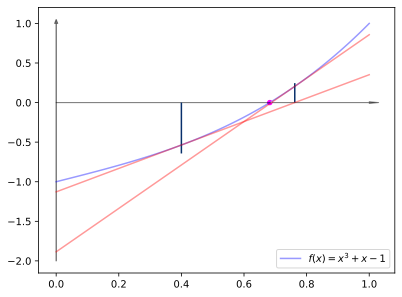

In [12]:
ax = plt.figure().add_subplot()
ax.plot(X, FX(X), c='blue', alpha=0.4, label='$f(x) = x^3 + x - 1$')
ax.scatter([nroot], [0], c='magenta', s=20)
ax.arrow(0, -2, 0, 3, head_width=0.01, head_length=0.05, color='black', alpha=0.5)
ax.arrow(0, 0, 1, 0, head_width=0.02, head_length=0.03, color='black', alpha=0.5)
ax.vlines(x=result, ymin=0, ymax=FX(result) * 1.2, colors=plt.cm.Blues(abs(FX(result)) * 10))
for var in result[:2]:
    ax.plot(X, X * DF(var) + FX(var) - var * DF(var), c='red', alpha=0.4)
ax.legend()
plt.show()

牛顿法可以理解为，斜率为我们指明了前进的方向以及速度，这样我们收敛的就会更快；

很显然，迭代公式中 $f'(x)$ 在分母的位置，这意味着，如果 $f'(x) = 0$ 时，迭代公式将失效

导数为 $0$ 是说我们失去了优化的方向，意味着无论走向那边都一样好，也一样坏。

人生有时候也是一样，我们需要看到比自己好的，同样也要看到比自己坏的，这样就能找到人生的梯度，指明了优化的方向。

## 参考

- 索尔. 数值分析[M/OL]. 吴兆金, 王国英, 范红军, 译. <a href="https://book.douban.com/press/2609">人民邮电出版社</a><span><span class="pl"> 译者</span>: <a class="" href="/search/%E5%90%B4%E5%85%86%E9%87%91">吴兆金</a> / <a class="" href="/search/%E7%8E%8B%E5%9B%BD%E8%8B%B1">王国英</a> / <a class="" href="/search/%E8%8C%83%E7%BA%A2%E5%86%9B">范红军</a> </span>, 2010. https://book.douban.com/subject/4188358/.